In [162]:
import numpy as np              
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd             
import seaborn as sns           
import sklearn                 

Загружаем данные:

In [163]:
url = "https://raw.githubusercontent.com/drwff/Machine-learning/master/songs.csv"
data = pd.read_csv(url)

In [164]:
data

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17729,155063,320000,0,NaN,2017-03-24 19:40:43,NaN,283,3,Hip-Hop,"[21, 811]",...,NaN,1283,NaN,Attribution,1050,NaN,4,NaN,"['old school beats', '2017 free instrumentals'...",Been On
17730,155064,320000,0,NaN,2017-03-24 19:40:44,NaN,250,2,Hip-Hop,"[21, 811]",...,NaN,1077,NaN,Attribution,858,NaN,2,NaN,"['old school beats', '2017 free instrumentals'...",Send Me
17731,155065,320000,0,NaN,2017-03-24 19:40:45,NaN,219,3,Hip-Hop,"[21, 811]",...,NaN,1340,NaN,Attribution,1142,NaN,1,NaN,"['old school beats', '2017 free instrumentals'...",The Question
17732,155066,320000,0,NaN,2017-03-24 19:40:47,NaN,252,6,Hip-Hop,"[21, 811]",...,NaN,2065,NaN,Attribution,1474,NaN,3,NaN,"['old school beats', '2017 free instrumentals'...",Roy


Приведем столбцы к категориальному типу:

In [165]:
data['genre_top'] = data['genre_top'].astype('category')
data['composer'] = data['composer'].astype('category')
data['date_recorded'] = data['date_recorded'].astype('category')
data['information'] = data['information'].astype('category')
data['language_code'] = data['language_code'].astype('category')
data['license'] = data['license'].astype('category')
data['lyricist'] = data['lyricist'].astype('category')
data['publisher'] = data['publisher'].astype('category')


Заполняем пропущенные значения:

In [166]:
data.isna().sum()

track_id             0
bit_rate             0
comments             0
composer         17568
date_created         0
date_recorded    15836
duration             0
favorites            0
genre_top            0
genres               0
genres_all           0
information      17252
interest             0
language_code    13645
license             20
listens              0
lyricist         17681
number               0
publisher        17682
tags                 0
title                0
dtype: int64

Пропуски в количественных признаках заполняем медианой.

In [167]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data.isna().sum()

track_id             0
bit_rate             0
comments             0
composer         17568
date_created         0
date_recorded    15836
duration             0
favorites            0
genre_top            0
genres               0
genres_all           0
information      17252
interest             0
language_code    13645
license             20
listens              0
lyricist         17681
number               0
publisher        17682
tags                 0
title                0
dtype: int64

В категориальных признаках заполняем модой

In [168]:
data['composer'].fillna(data['composer'].mode().iloc[0], inplace=True)
data['date_recorded'].fillna(data['date_recorded'].mode().iloc[0], inplace=True)
data['information'].fillna(data['information'].mode().iloc[0], inplace=True)
data['language_code'].fillna(data['language_code'].mode().iloc[0], inplace=True)
data['lyricist'].fillna(data['lyricist'].mode().iloc[0], inplace=True)
data['publisher'].fillna(data['publisher'].mode().iloc[0], inplace=True)
data['license'].fillna(data['license'].mode().iloc[0], inplace=True)

data.isna().sum()

track_id         0
bit_rate         0
comments         0
composer         0
date_created     0
date_recorded    0
duration         0
favorites        0
genre_top        0
genres           0
genres_all       0
information      0
interest         0
language_code    0
license          0
listens          0
lyricist         0
number           0
publisher        0
tags             0
title            0
dtype: int64

Сделаем векторизацию категориальных признаков:

In [169]:
composer_dummies = pd.get_dummies(data['composer'])
date_recorded_dummies = pd.get_dummies(data['date_recorded'])
information_dummies = pd.get_dummies(data['information'])
language_code_dummies = pd.get_dummies(data['language_code'])
lyricist_dummies = pd.get_dummies(data['lyricist'])
publisher_dummies = pd.get_dummies(data['publisher'])
license_dummies = pd.get_dummies(data['license'])
genre_dummies = pd.get_dummies(data['genre_top'])


data = pd.concat((data, composer_dummies), axis=1)
data = pd.concat((data, date_recorded_dummies), axis=1)
data = pd.concat((data, information_dummies), axis=1)
data = pd.concat((data, language_code_dummies), axis=1)
data = pd.concat((data, lyricist_dummies), axis=1)
data = pd.concat((data, publisher_dummies), axis=1)
data = pd.concat((data, license_dummies), axis=1)
data = pd.concat((data, genre_dummies), axis=1)

y = data['genre_top']

data = data.drop(['composer'], axis=1)
data = data.drop(['date_recorded'], axis=1)
data = data.drop(['information'], axis=1)
data = data.drop(['language_code'], axis=1)
data = data.drop(['lyricist'], axis=1)
data = data.drop(['publisher'], axis=1)
data = data.drop(['license'], axis=1)
data = data.drop(['genre_top'], axis=1)


data.head()




,track_id,bit_rate,comments,date_created,duration,favorites,genres,genres_all,interest,listens,...,Attribution-ShareAlike 3.0 International,CC0 1.0 Universal,Creative Commons Attribution,Creative Commons Attribution-NonCommercial-NoDerivatives 4.0,Music Sharing,Noncommercial Sampling Plus,Sampling Plus,ideology.de,Hip-Hop,Rock
0,135,256000,1,2008-11-26 01:43:26,837,0,"[45, 58]","[58, 12, 45]",2484,1832,...,0,0,0,0,0,0,0,0,0,1
1,136,256000,1,2008-11-26 01:43:35,509,0,"[45, 58]","[58, 12, 45]",1948,1498,...,0,0,0,0,0,0,0,0,0,1
2,151,192000,0,2008-11-26 01:44:55,192,0,[25],"[25, 12]",701,148,...,0,0,0,0,0,0,0,0,0,1
3,152,192000,0,2008-11-26 01:44:58,193,0,[25],"[25, 12]",637,98,...,0,0,0,0,0,0,0,0,0,1
4,153,256000,0,2008-11-26 01:45:00,405,5,[26],"[26, 12]",354,424,...,0,0,0,0,0,0,0,0,0,1


Уберем повторяющиеся столбцы и нормализуем наши данные: 

In [170]:

data = data.loc[:,~data.columns.duplicated()]
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()


,Alexander Naumov,1981-01-01 00:00:00,1982-08-23 00:00:00,1982-11-26 00:00:00,1988-01-01 00:00:00,1991-11-26 00:00:00,1994-11-26 00:00:00,1995-11-26 00:00:00,1995-12-05 00:00:00,1996-07-21 00:00:00,...,number,pt,ru,sentense,sr,tr,track_id,traditional,uses samples from\n\na) Jazu64 Fenslerfilm GI Joe PSA 18 – pimp http://www.youtube.com/watch?v=LjuPGKvdeFo\n\nb) nikolat allconnected_88bpm.wav http://www.freesound.org/samplesViewSingle.php?id=22126,zh
count,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,...,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04
mean,2.070440e-16,1.431887e-14,-7.671903e-16,-4.044959e-15,-7.679916e-16,1.121457e-15,-6.566062e-16,1.132676e-15,-2.319950e-15,6.692395e-15,...,-1.858274e-15,-3.092243e-15,6.404794e-16,-7.671903e-16,3.949334e-15,-2.049100e-15,1.809762e-16,-7.680183e-16,-7.672170e-16,1.168244e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.061998e-02,-3.831684e-02,-7.509251e-03,-2.375237e-02,-7.509251e-03,-1.300714e-02,-7.509251e-03,-1.300714e-02,-1.501977e-02,-2.124356e-02,...,-8.740715e-01,-3.360040e-02,-3.187434e-02,-7.509251e-03,-3.097541e-02,-1.501977e-02,-1.515622e+00,-7.509251e-03,-7.509251e-03,-1.061998e-02
25%,-1.061998e-02,-3.831684e-02,-7.509251e-03,-2.375237e-02,-7.509251e-03,-1.300714e-02,-7.509251e-03,-1.300714e-02,-1.501977e-02,-2.124356e-02,...,-5.913884e-01,-3.360040e-02,-3.187434e-02,-7.509251e-03,-3.097541e-02,-1.501977e-02,-8.608824e-01,-7.509251e-03,-7.509251e-03,-1.061998e-02
50%,-1.061998e-02,-3.831684e-02,-7.509251e-03,-2.375237e-02,-7.509251e-03,-1.300714e-02,-7.509251e-03,-1.300714e-02,-1.501977e-02,-2.124356e-02,...,-1.673639e-01,-3.360040e-02,-3.187434e-02,-7.509251e-03,-3.097541e-02,-1.501977e-02,-1.135894e-01,-7.509251e-03,-7.509251e-03,-1.061998e-02
75%,-1.061998e-02,-3.831684e-02,-7.509251e-03,-2.375237e-02,-7.509251e-03,-1.300714e-02,-7.509251e-03,-1.300714e-02,-1.501977e-02,-2.124356e-02,...,2.566607e-01,-3.360040e-02,-3.187434e-02,-7.509251e-03,-3.097541e-02,-1.501977e-02,8.747180e-01,-7.509251e-03,-7.509251e-03,-1.061998e-02
max,9.415678e+01,2.609671e+01,1.331616e+02,4.209869e+01,1.331616e+02,7.687652e+01,1.331616e+02,7.687652e+01,6.657515e+01,4.707043e+01,...,1.326008e+01,2.975987e+01,3.137143e+01,1.331616e+02,3.228185e+01,6.657515e+01,1.876720e+00,1.331616e+02,1.331616e+02,9.415678e+01


Разбиение данных на обучающую и тестовую выборку:

In [171]:
X = data_stand

X = X.to_numpy(dtype='f')
y = np.array(y != 'Rock', dtype='int')
y

array([0, 0, 0, ..., 1, 1, 1])

In [172]:
X[np.isnan(X)] = 0.0
print(X.shape)
print(y.shape)
N, d = X.shape


(17734, 467)
(17734,)


In [173]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)


12413 5321


Обучение классификатора:

In [175]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', random_state=42, solver='lbfgs')

Проверяем качество классификатора:

In [176]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_test = np.mean(y_test != y_test_pred)
err_train = np.mean(y_train != y_train_pred)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [177]:
print('Train error: {}, Test error: {}'.format(err_train, err_test))
print("Train accuracy: {:.2f}% Test accuracy: {:.2f}%".format(train_acc* 100, test_acc * 100))

Train error: 0.0, Test error: 0.0009396729937981583
Train accuracy: 100.00% Test accuracy: 99.91%


Подбор параметра регуляризации alpha:

In [178]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,),
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Построение графика зависимости ошибки от alpha:

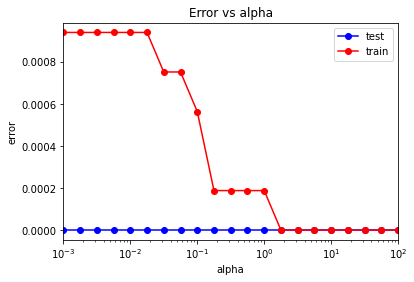

In [179]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Построение графика зависимости точности от alpha:

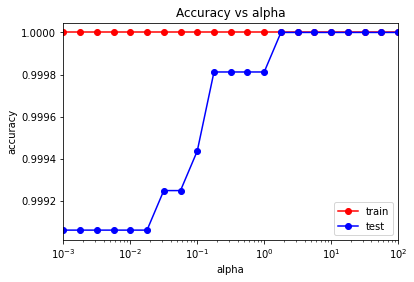

In [180]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label='train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label='test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs alpha')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()
pass

Минимальное значение ошибки и оптимальное значение alpha:

In [181]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
alpha_opt = alpha_arr[test_err == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Alpha: ', alpha_opt)

Min train error: 0.0, 	Min test error: 0.0
Alpha:  1.7782794100389228


Классификатор при найденном значении alpha:

In [182]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print('Train error: {}, Test error: {}'.format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Train error: 0.0, Test error: 0.0


Матрица рассогласования:

In [183]:
print(confusion_matrix(y_test_pred, y_test))

[[4249    0]
 [   0 1072]]


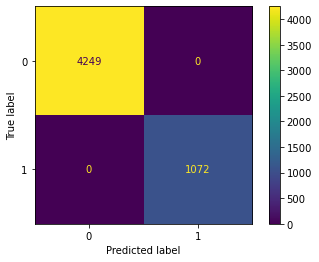

In [184]:
predictions = mlp_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot()
plt.show()

Подбор числа нейронов в скрытом слое:

In [185]:
neurons_arr = np.arange(10, 150, 5)
test_err = []
train_err = []
train_acc = []
test_acc = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Построение графика зависимости ошибки от количества нейронов:

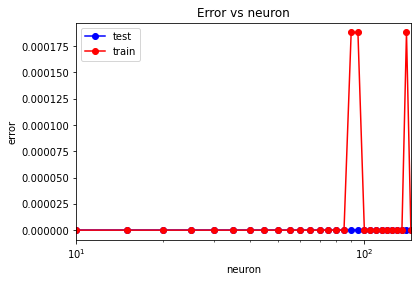

In [186]:
plt.semilogx(neurons_arr, train_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs neuron')
plt.xlabel('neuron')
plt.ylabel('error')
plt.legend()
pass

Построение графика зависимости точности от количества нейронов:

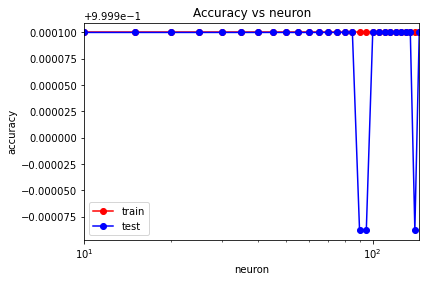

In [187]:
plt.semilogx(neurons_arr, train_acc, 'r-o', label='train')
plt.semilogx(neurons_arr, test_acc, 'b-o', label='test')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Accuracy vs neuron')
plt.xlabel('neuron')
plt.ylabel('accuracy')
plt.legend()
pass

Минимальное значение ошибки и оптимальное число нейронов:

In [188]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
neuron_opt = neurons_arr[test_err == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Neuron: ', neuron_opt)

Min train error: 0.0, 	Min test error: 0.0
Neuron:  10


Классификатор при найденном значении нейронов:


In [189]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print('Train error: {}, Test error: {}'.format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Train error: 0.0, Test error: 0.0


## Выводы:
Исходя из графика зависимости параметра alpha от точности, можем наблюдать переобучение. При alpha равное оптимальному точность и на тестовой и на обучающей выборке совпадает, то есть получаем оптимальное значение для параметра регуляризации.
По графику зависимостей количества нейронов от точности видим, что точность зависит от числа нейронов, начиная с оптимального значения нейронов = 10 точность на тестовой и обучающей выборках совпадает, при определенных значениях нейронов наблюдается недообучение, поскольку значение точности резко уменьшается.
При подборе оптимальных значений гиперпараметров удалось достичь максимальной точности, но на тренировочной выборке изначально наблюдалось переобучение.